**Question 3: Data Pre-processing**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

Step 1: Generate Features

In [ ]:
def generate_sparse_signal(signal_length, num_nonzero, my_index_no):
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 10 * np.random.randn(num_nonzero)
    signal[nonzero_indices] = nonzero_values
    
    # Modify element at index 10 according to index number rules
    signal[10] = (my_index_no % 10) * 2 + 10
    if my_index_no % 10 == 0:
        signal[10] = np.random.randn() + 30
    
    return signal / 5  # scale down

def generate_noise_signal(signal_length):
    return np.random.normal(0, 15, signal_length)


In [ ]:
# Parameters
signal_length = 100
num_nonzero = 10
my_index_no = 220647  # index number


In [4]:
# Generate features
feature1 = generate_sparse_signal(signal_length, num_nonzero, my_index_no)
feature2 = generate_noise_signal(signal_length)

Step 2: Visualize Original Features 

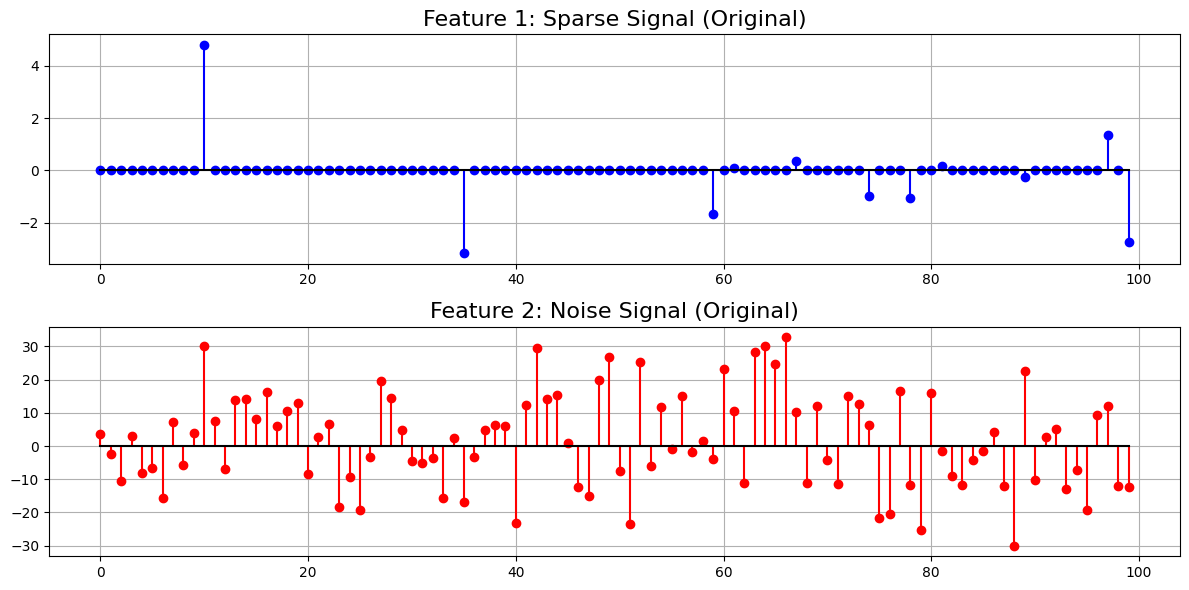

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.stem(feature1, linefmt='b-', markerfmt='bo', basefmt='k-')
plt.title("Feature 1: Sparse Signal (Original)", fontsize=16)
plt.grid(True)

plt.subplot(2, 1, 2)
plt.stem(feature2, linefmt='r-', markerfmt='ro', basefmt='k-')
plt.title("Feature 2: Noise Signal (Original)", fontsize=16)
plt.grid(True)

plt.tight_layout()
plt.show()

Step 3: Apply Scaling Methods

In [ ]:
scalers = {
    "Standard Scaling": StandardScaler(),
    "Min-Max Scaling": MinMaxScaler(),
    "Max-Abs Scaling": MaxAbsScaler()
}

scaled_feature1 = {}
scaled_feature2 = {}

for name, scaler in scalers.items():
    scaled_feature1[name] = scaler.fit_transform(feature1.reshape(-1, 1)).flatten()
    scaled_feature2[name] = scaler.fit_transform(feature2.reshape(-1, 1)).flatten()


Step 4: Analyze Scaled Features

In [ ]:
print("Feature 1 (Sparse Signal): Number of zeros after scaling")
for name, data in scaled_feature1.items():
    zeros_count = np.sum(data == 0)
    print(f"  {name}: {zeros_count} zeros")

print("\nFeature 2 (Noise Signal): Mean and standard deviation after scaling")
for name, data in scaled_feature2.items():
    print(f"  {name}: Mean = {np.mean(data):.2f}, Std = {np.std(data):.2f}")

Feature 1 (Sparse Signal): Number of zeros after scaling
  Standard Scaling: 0 zeros
  Min-Max Scaling: 1 zeros
  Max-Abs Scaling: 89 zeros

Feature 2 (Noise Signal): Mean and standard deviation after scaling
  Standard Scaling: Mean = 0.00, Std = 1.00
  Min-Max Scaling: Mean = 0.50, Std = 0.23
  Max-Abs Scaling: Mean = 0.05, Std = 0.43


Step 5: Visualize Scaled Features

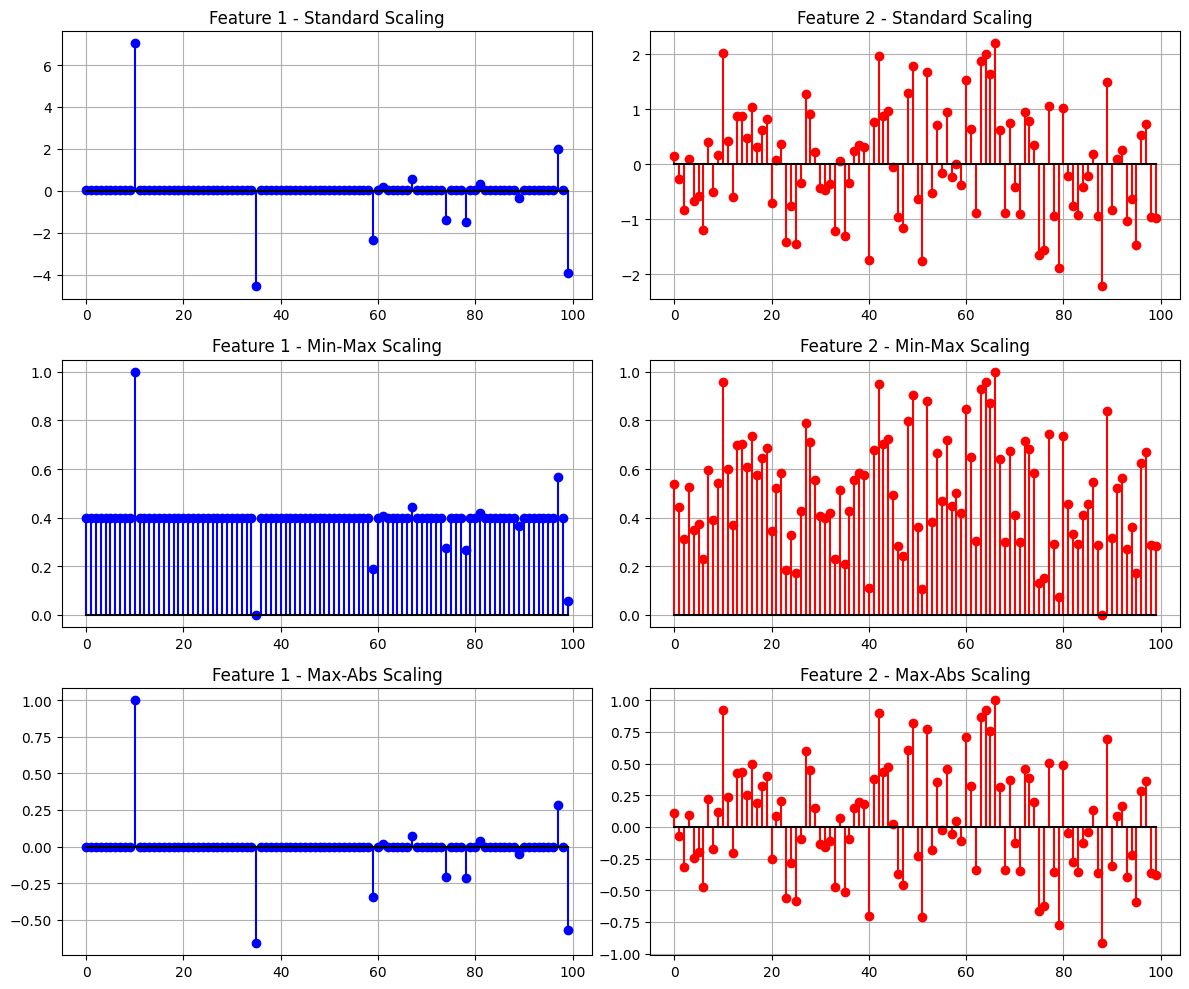

In [ ]:
plt.figure(figsize=(12, 10))
for i, name in enumerate(scalers.keys(), start=1):
    plt.subplot(3, 2, 2*i - 1)
    plt.stem(scaled_feature1[name], linefmt='b-', markerfmt='bo', basefmt='k-')
    plt.title(f"Feature 1 - {name}")
    plt.grid(True)

    plt.subplot(3, 2, 2*i)
    plt.stem(scaled_feature2[name], linefmt='r-', markerfmt='ro', basefmt='k-')
    plt.title(f"Feature 2 - {name}")
    plt.grid(True)

plt.tight_layout()
plt.show()
